## Title Goes Here
### Anya Michaelsen


#### Shift Time Analysis

According to an episode of Brooklyn 99, cops may initiate frivolous arrests close to the end of their shifts in order to work past their shift and receive overtime. I want to exame the Berkeley PD calls data to see if there are any times of day where a spike in minor crime calls are made, potentially indicating a similar end-of-shift arrest spree. 

http://brunettilaw.com/police-overtime-incentive

https://oaklandnorth.net/2021/04/28/oakland-police-overtime-payments/

Alternative Data:
https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Stop-Data-Jan-26-2015-to-Sep-30-2020-/4tbf-3yt8/data

In [38]:
# import packages
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# load in the data from Berkeley-PD-calls-for-service.csv
calls = pd.read_csv("Berkeley_PD_-_Calls_for_Service.csv")

In [3]:
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET &amp; MCGEE AVE\nBerkeley, CA\n(...",OREGON STREET & MCGEE AVE,Berkeley,CA
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA
3,18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST\nBerkeley, CA\n(37.881142, -122....",1200 SIXTH ST,Berkeley,CA
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA


In [4]:
calls[['OFFENSE','CVLEGEND']].sort_values(by="CVLEGEND")
# so 'OFFENSE' is a subspecification of 'CVLEGEND'

,OFFENSE,CVLEGEND
572,MUNICIPAL CODE,ALL OTHER OFFENSES
3749,MUNICIPAL CODE,ALL OTHER OFFENSES
2178,MUNICIPAL CODE,ALL OTHER OFFENSES
3578,ARSON,ARSON
1064,ARSON,ARSON
...,...,...
1420,BRANDISHING,WEAPONS OFFENSE
248,BRANDISHING,WEAPONS OFFENSE
2360,GUN/WEAPON,WEAPONS OFFENSE
848,BRANDISHING,WEAPONS OFFENSE


In [5]:
for category in calls['CVLEGEND'].unique():
    print("Category: ", category)
    offenses = list(calls[calls["CVLEGEND"]==category]["OFFENSE"].unique())
    for off in offenses:
        print("   ",off)

Category:  DISORDERLY CONDUCT
    DISTURBANCE
    VICE
Category:  LARCENY
    THEFT MISD. (UNDER $950)
    THEFT FELONY (OVER $950)
    THEFT FROM PERSON
Category:  BURGLARY - VEHICLE
    BURGLARY AUTO
Category:  LIQUOR LAW VIOLATION
    ALCOHOL OFFENSE
Category:  VANDALISM
    VANDALISM
Category:  FRAUD
    IDENTITY THEFT
    FRAUD/FORGERY
Category:  MOTOR VEHICLE THEFT
    VEHICLE STOLEN
Category:  ASSAULT
    ASSAULT/BATTERY MISD.
    ASSAULT/BATTERY FEL.
Category:  LARCENY - FROM VEHICLE
    THEFT FROM AUTO
Category:  DRUG VIOLATION
    NARCOTICS
Category:  RECOVERED VEHICLE
    VEHICLE RECOVERED
Category:  BURGLARY - RESIDENTIAL
    BURGLARY RESIDENTIAL
Category:  ROBBERY
    ROBBERY
Category:  WEAPONS OFFENSE
    BRANDISHING
    GUN/WEAPON
Category:  FAMILY OFFENSE
    DOMESTIC VIOLENCE
Category:  SEX CRIME
    SEXUAL ASSAULT FEL.
    SEXUAL ASSAULT MISD.
Category:  BURGLARY - COMMERCIAL
    BURGLARY COMMERCIAL
Category:  ARSON
    ARSON
Category:  MISSING PERSON
    MISSING ADUL

#### Minor Crime Classification

Now cops looking for overtime pay are not likely to frivolously accuse someone of homocide or identity theft, so we want to use the list above to select "minor crimes" that might be possible for cops to artificially instigate at the end of their shifts. Based on the list above we select the following for our "minor crimes" list

Category:  DISORDERLY CONDUCT-
    DISTURBANCE
    VICE

Category:  LARCENY-
    THEFT MISD. (UNDER $950)
    THEFT FROM PERSON

Category:  LIQUOR LAW VIOLATION-
    ALCOHOL OFFENSE

Category:  VANDALISM-
    VANDALISM

Category:  ASSAULT-
    ASSAULT/BATTERY MISD.

Category:  WEAPONS OFFENSE-
    BRANDISHING

Category:  NOISE VIOLATION-
    2ND RESPONSE
    DISTURBANCE - NOISE

In [6]:
minor_crimes_list = ['DISTURBABCE','VICE','THEFT MISD. (UNDER $950)', 'THEFT FROM PERSON', 'ALCOHOL OFFENSE',
               'VANDALISM', 'ASSAULT/BATTERY MISD.', 'BRANDISHING', '2ND RESPONSE', 'DISTURBANCE - NOISE']

In [7]:
minor_crime_calls = calls[calls["OFFENSE"].isin(minor_crimes_list)]
minor_crime_calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA
5,18044311,VANDALISM,08/07/2018 12:00:00 AM,10:46,VANDALISM,2,09/06/2018 03:30:10 AM,"2300 SHATTUCK AVE\nBerkeley, CA\n(37.867176, -...",2300 SHATTUCK AVE,Berkeley,CA
7,18091024,THEFT MISD. (UNDER $950),06/27/2018 12:00:00 AM,13:40,LARCENY,3,09/06/2018 03:30:13 AM,"1500 HARMON ST\nBerkeley, CA\n(37.848812, -122...",1500 HARMON ST,Berkeley,CA


In [8]:
minor_crime_calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA
5,18044311,VANDALISM,08/07/2018 12:00:00 AM,10:46,VANDALISM,2,09/06/2018 03:30:10 AM,"2300 SHATTUCK AVE\nBerkeley, CA\n(37.867176, -...",2300 SHATTUCK AVE,Berkeley,CA
7,18091024,THEFT MISD. (UNDER $950),06/27/2018 12:00:00 AM,13:40,LARCENY,3,09/06/2018 03:30:13 AM,"1500 HARMON ST\nBerkeley, CA\n(37.848812, -122...",1500 HARMON ST,Berkeley,CA


In [10]:
# create time object for histogram plots 
minor_crime_calls["HOUR"]   = minor_crime_calls["EVENTTM"].str.split(":").str[0]
minor_crime_calls["MINUTE"] = minor_crime_calls["EVENTTM"].str.split(":").str[1]
minor_crime_calls[["EVENTTM","HOUR","MINUTE"]].head()

<ipython-input-10-82c229d18e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_crime_calls["HOUR"]   = minor_crime_calls["EVENTTM"].str.split(":").str[0]
<ipython-input-10-82c229d18e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_crime_calls["MINUTE"] = minor_crime_calls["EVENTTM"].str.split(":").str[1]


,EVENTTM,HOUR,MINUTE
1,21:25,21,25
2,20:00,20,00
4,13:29,13,29
5,10:46,10,46
7,13:40,13,40


In [37]:
#create datetime column with time of day 
minor_crime_calls["TIMEOFDAY"] = pd.to_datetime(minor_crime_calls["EVENTTM"])

<ipython-input-37-e083f9d33ae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_crime_calls["TIMEOFDAY"] = pd.to_datetime(minor_crime_calls["EVENTTM"])


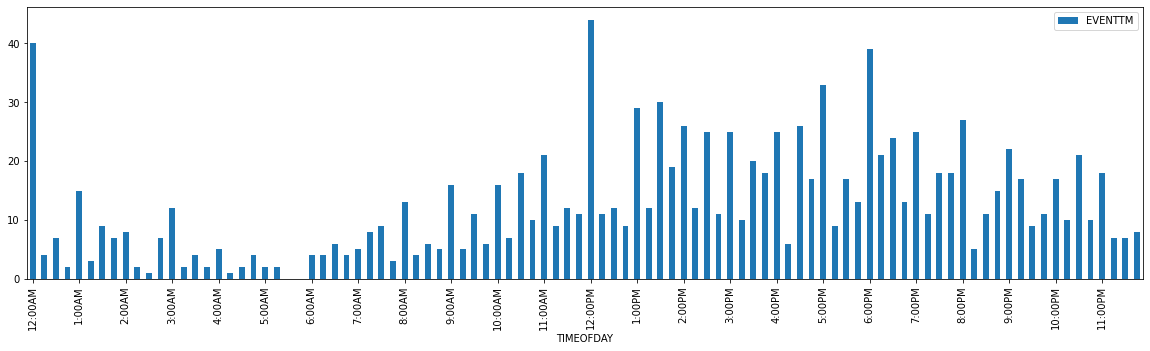

In [52]:
# Getting the histogram
ax = minor_crime_calls[["TIMEOFDAY","EVENTTM"]].groupby(pd.Grouper(key="TIMEOFDAY", freq='15Min')).count().plot(kind='bar', figsize=(20,5));
ax.set_xticks(list(range(0,96,4)));
hour_labels = ["12:00AM", "1:00AM", "2:00AM", "3:00AM", "4:00AM", "5:00AM", 
                    "6:00AM", "7:00AM", "8:00AM", "9:00AM", "10:00AM", "11:00AM", 
                    "12:00PM", "1:00PM", "2:00PM", "3:00PM", "4:00PM", "5:00PM", 
                    "6:00PM", "7:00PM", "8:00PM", "9:00PM", "10:00PM", "11:00PM"]
ax.set_xticklabels(hour_labels);

In [57]:
minor_crime_calls.head()
minor_crime_calls["MINUTE"] = minor_crime_calls["MINUTE"].astype(int)

<ipython-input-57-0f8d77b2fad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_crime_calls["MINUTE"] = minor_crime_calls["MINUTE"].astype(int)


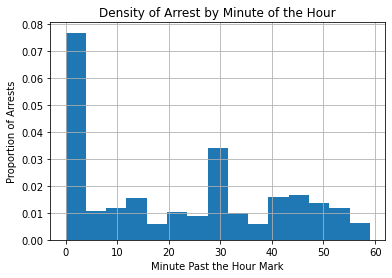

In [79]:
ax = minor_crime_calls.hist(column="MINUTE", bins=15, density=True)[0][0];
ax.set_title("Density of Arrest by Minute of the Hour");
ax.set_xlabel("Minute Past the Hour Mark");
ax.set_ylabel("Proportion of Arrests");
#could the spikes be shifts ending or clerical rounding???

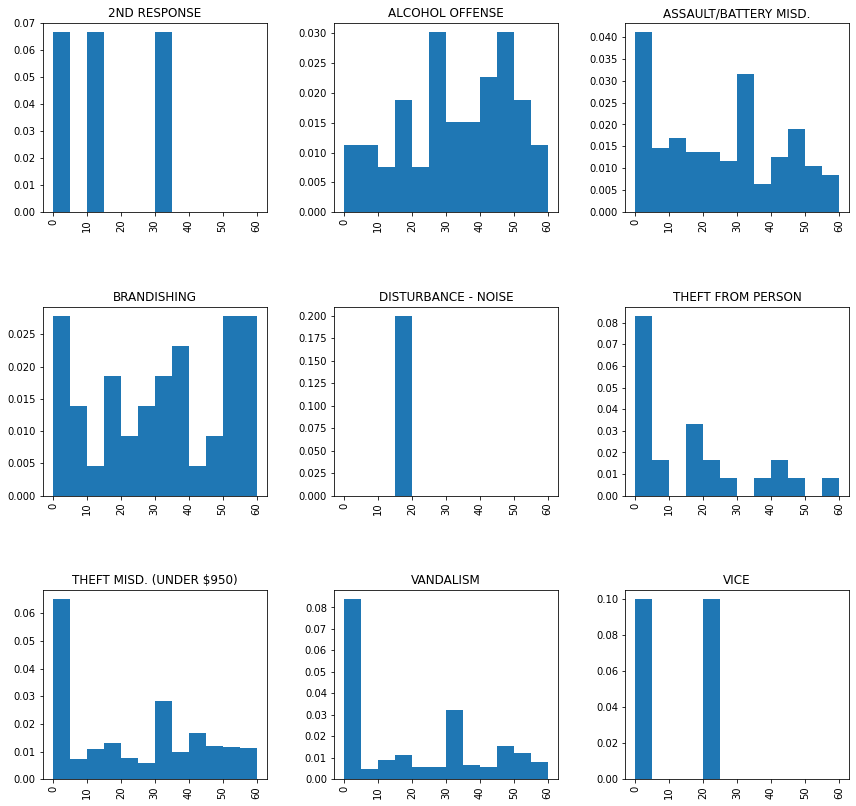

In [76]:
ax = minor_crime_calls.hist(column="MINUTE", by="OFFENSE", bins=12, density=True, figsize=(14,14), range=(0,60))[0][0];
#ax.set_title("Density of Arrest by Minute of the Hour");
#ax.set_xlabel("Minute Past the Hour Mark");
#ax.set_ylabel("Proportion of Arrests");

In [78]:
minor_crime_calls["MINUTE"].value_counts().sort_values()

3       2
51      3
17      3
24      3
33      3
13      4
37      4
12      4
23      4
9       4
8       4
6       4
28      4
41      4
21      5
46      5
7       5
29      6
38      6
59      6
27      6
44      6
48      6
54      6
26      6
32      6
18      7
22      7
49      7
56      7
57      7
19      7
11      8
4       8
31      8
53      8
52      8
39      8
1       9
43      9
36      9
2       9
34     10
58     10
47     11
16     11
14     11
42     15
25     27
35     28
20     32
55     34
5      34
10     39
40     47
50     48
15     54
45     57
30    142
0     342
Name: MINUTE, dtype: int64